In [16]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'DataSet')

Text(0.5, 0, 'X_0')

Text(0, 0.5, 'X_1')

Text(0.5, 0.5, 'y=1')

Text(-0.5, -0.5, 'y=0')

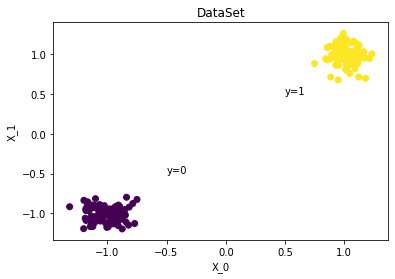

In [17]:
#generate dataset
class_1=np.random.multivariate_normal(mean=[1,1],cov=[[0.01,0],[0,0.01]],size=100)
class_0=np.random.multivariate_normal(mean=[-1,-1],cov=[[0.01,0],[0,0.01]],size=100)
lable_1=np.ones((100))
lable_0=np.zeros((100,))
lable1=np.concatenate([lable_1,lable_0])
lable=lable1.reshape(-1,1)
dataset=np.vstack([class_1,class_0])

plt.figure(0)
plt.scatter(dataset[:,0],dataset[:,1],c=lable1)
plt.title('DataSet')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.text(0.5,0.5,'y=1')
plt.text(-0.5,-0.5,'y=0')

In [19]:
#initialization 
m=dataset.shape[0]  #sample numbers
n=dataset.shape[1]  #features numbers
alpha=0.001    #learning rate
#2 features , 2 w
epoch=1000
j=0.0  #cost funstion
x=dataset
y=lable

b =np.float64(1)   #bias
dw1=dw2=db=np.float64(0)
w1=np.random.normal(loc=0.0,scale=0.01,size=1)   #weight init  
w2=np.random.normal(loc=0.0,scale=0.01,size=1)     
cost=[]
z_SigInput=[]


In [21]:
#functions
def  sigmoid_func(z):
   a=1.0/(1.0+np.exp(-z))
   return  a

def cost_func(z,y):
 j2=-np.log((1-sigmoid_func(z)))*(1-y)
 j1=-np.log(sigmoid_func(z))*(y)
 j=(j1+j2)
 return  j

#gradient descent alg
for epochs in range(epoch):
    j=dw1=dw2=db=0
    for i in range(m):
        z=w1*x[i,0]+w2*x[i,1]+b
        z_SigInput.append(z)
        a=sigmoid_func(z)
        j+=cost_func(z,y[i,])
        dw1+=(a-y[i,])*x[i,0]
        dw2+=(a-y[i,])*x[i,1]
        db+=(a-y[i,])
    
    dw1=dw1*(1.0/m) 
    dw2=dw2*1.0/m 
    db=db*1.0/m 
    j=j/m
    cost.append(j)
    w1=w1-alpha*dw1
    w2-=alpha*dw2
    b-=alpha*db
 
print("w1 =", w1," w2 =", w2," bias =", b ,sep=' ')

w1 = [0.40104515]  w2 = [0.43297497]  bias = [0.80119412]


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'DataSet')

Text(0.5, 0, 'X_0')

Text(0, 0.5, 'X_1')

Text(0.5, 0.5, 'y=1')

Text(-0.5, -0.5, 'y=0')

200000

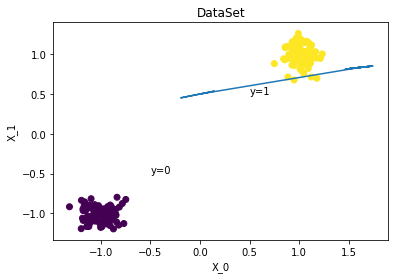

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Cost Function')

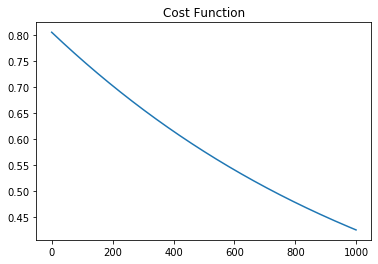

In [22]:
plt.figure(0)
plt.scatter(dataset[:,0],dataset[:,1],c=lable1)
plt.title('DataSet')
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.text(0.5,0.5,'y=1')
plt.text(-0.5,-0.5,'y=0')

#plot sigmoid with respect to z  
z_SigInput=np.array(z_SigInput)
len(z_SigInput)
z_SigInput=z_SigInput[-200:len(z_SigInput)]
plt.plot(z_SigInput,sigmoid_func(z_SigInput))
plt.show()

#plot loss function
plt.figure(1)
plt.plot(cost)
plt.title('Cost Function')
plt.show()